In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="Ayutthaya",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,3069,471,70294,2030,254,1566,16137,1392,655,472,...,48.223830,37.278020,59467272,0.11918,12393.628934,1.141681e+06,9067.811413,1.064454e+06,178,143862.554
1996,3305,513,80942,2290,324,5205,19161,1626,819,595,...,45.255728,37.081286,60130190,0.11918,13253.421437,1.144784e+06,9114.326420,1.064306e+06,172,171503.917
1997,4056,474,86917,2697,382,1756,20641,2219,675,575,...,46.814732,36.564600,60846588,0.10214,13493.539750,1.145651e+06,9127.316886,1.064264e+06,170,179223.451
1998,4805,395,84878,3388,420,1166,22362,2306,666,585,...,42.303171,36.111727,61585103,0.17525,13536.724929,1.145807e+06,9129.653216,1.064257e+06,170,180611.806
1999,4030,302,92332,2974,503,1397,22431,2483,685,836,...,44.267746,36.378900,62298569,0.24836,13824.290188,1.146844e+06,9145.210574,1.064207e+06,168,189856.706


## Principal Component Analysis : Scikit-Learn

In [5]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_7850/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [6]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [7]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [8]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดพระนครศรีอยุธยา (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.037793,-1.001167,-1.291729,-1.128667,-0.573264,-1.288699,-1.219066,-1.110776,-1.328405,-1.503927,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-1.156648,-1.226169,-1.233198,-0.174007,1.220085
2017,0.753836,1.731328,1.034268,2.264728,1.015876,2.090815,1.780217,1.536459,1.655545,0.595153,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,1.771241,1.237238,1.680753,1.242648,-1.002213
1995,-1.310914,-0.756574,-1.582141,-1.645755,-1.901102,-1.117648,-1.997936,-1.358005,-1.367293,-2.536447,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-1.577385,-1.625464,-1.625580,0.125882,1.655830
2015,0.793341,1.553310,1.346147,0.882173,0.418616,1.036172,1.336828,1.076671,1.035941,0.311494,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,1.311852,1.175215,0.565442,0.806383,-0.348596
2016,0.430411,1.834086,1.078914,0.939688,0.562598,1.370176,1.474312,1.250706,1.216118,0.266108,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,1.569830,1.209939,1.635126,1.168725,-0.827915
2004,-0.535602,-0.661052,-0.582066,-0.393020,1.629135,-0.641946,-0.367926,-0.821851,-0.682877,0.782368,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.407381,-0.515088,-0.534426,-0.708063,0.435745
2013,2.333449,0.279690,1.279612,0.905727,-0.013332,0.447110,0.660792,0.637505,0.866133,-0.230296,...,2.031246,0.817415,-0.339516,0.845079,0.308047,0.804731,1.134459,0.939732,1.193950,-2.048000
2008,0.985464,0.062596,1.016966,-0.132833,-0.514604,0.182943,0.340284,0.635919,0.667808,1.446131,...,0.695164,1.316243,1.579509,0.246595,-0.672905,0.424566,0.932889,0.888486,-1.795563,-1.132936
2003,-0.792808,-1.079321,-0.685156,-0.643348,1.821112,-0.936477,-0.425345,-0.864680,-0.990086,0.243415,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.544796,-0.645500,-0.662581,-0.610117,0.566468


In [9]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [10]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [11]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [12]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(21.341677216045333,
  array([-0.18611751+0.j, -0.19645574+0.j, -0.21004653+0.j, -0.20822956+0.j,
         -0.06850534+0.j, -0.19920445+0.j, -0.20746954+0.j, -0.2087754 +0.j,
         -0.2135885 +0.j, -0.13236213+0.j, -0.20880172+0.j, -0.16620102+0.j,
         -0.20458082+0.j, -0.21111173+0.j, -0.209643  +0.j, -0.21344621+0.j,
         -0.20753152+0.j, -0.18876347+0.j, -0.19386648+0.j, -0.09699985+0.j,
         -0.05163383+0.j, -0.08192225+0.j,  0.06031106+0.j, -0.20962253+0.j,
         -0.17526345+0.j, -0.21047688+0.j, -0.20830362+0.j, -0.21085823+0.j,
         -0.12251046+0.j,  0.19354531+0.j])),
 (4.102770303774184,
  array([-0.0764663 +0.j,  0.13153081+0.j, -0.05299136+0.j,  0.06319242+0.j,
          0.07016846+0.j,  0.0461853 +0.j,  0.06518119+0.j,  0.01180525+0.j,
         -0.00584367+0.j, -0.28463325+0.j,  0.10607868+0.j, -0.03496752+0.j,
         -0.10986784+0.j,  0.05934117+0.j, -0.03518853+0.j, -0.02745778+0.j,
          0.11247892+0.j,  0.03373164+0.j, -0.1626668 +0.j, -0.4

In [13]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [14]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([7.68156250e+03, 9.93750000e+02, 1.90355250e+05, 5.03450000e+03,
       6.10500000e+02, 2.67025000e+03, 3.22821875e+04, 7.38475000e+03,
       1.70981250e+03, 1.36618750e+03, 4.09368750e+03, 3.65112500e+03,
       7.05000000e+03, 1.39425000e+03, 4.29868750e+03, 3.96662500e+03,
       2.14418750e+03, 1.43875000e+02, 1.26262500e+03, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.77573191e+04, 1.16269968e+06, 9.38846420e+03,
       1.06435058e+06, 1.40000000e+02])

In [15]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                     7.681562e+03
Mining and quarrying                                                  9.937500e+02
Manufacturing                                                         1.903552e+05
Electricity, gas, steam and air conditioning supply                   5.034500e+03
Water supply sewerage, waste management and remediation activities    6.105000e+02
Construction                                                          2.670250e+03
Wholesale and retail trade and repair of motor vehicles               3.228219e+04
Transportation and storage                                            7.384750e+03
Accommodation and food service activities                             1.709812e+03
Information and communication                                         1.366188e+03
Financial and insurance activities                                    4.093688e+03
Real estate activities                                                3.651125e+03
Prof

In [16]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([3.40685502e+03, 6.69003317e+02, 7.34756392e+04, 1.76763486e+03,
       1.81568169e+02, 9.56638418e+02, 7.82432883e+03, 4.27277798e+03,
       7.46963538e+02, 3.41340962e+02, 2.39320634e+03, 6.94491709e+02,
       3.95814737e+03, 9.58396415e+02, 1.65030788e+03, 1.32249002e+03,
       1.04480873e+03, 7.10403714e+01, 6.37522929e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 3.29239248e+03, 1.25200690e+04, 1.90990700e+02,
       7.98982811e+02, 2.22204860e+01])

In [17]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                     3.518585e+03
Mining and quarrying                                                  6.909437e+02
Manufacturing                                                         7.588531e+04
Electricity, gas, steam and air conditioning supply                   1.825605e+03
Water supply sewerage, waste management and remediation activities    1.875228e+02
Construction                                                          9.880119e+02
Wholesale and retail trade and repair of motor vehicles               8.080932e+03
Transportation and storage                                            4.412906e+03
Accommodation and food service activities                             7.714606e+02
Information and communication                                         3.525354e+02
Financial and insurance activities                                    2.471693e+03
Real estate activities                                                7.172680e+02
Prof

In [18]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

#### components = 2

In [19]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components

from sklearn.decomposition import PCA

num_components=2
pca2 = PCA(n_components=num_components)
pca2.fit(sk_scaled_X_train)

PCA(n_components=2)

In [20]:
# Show variances (or eigenvalues) of selected components

pca2.explained_variance_

array([22.7644557 ,  4.37628832])

In [21]:
# Show principal components (or eigenvectors) of selected components

pca2.components_

array([[-0.18611751, -0.19645574, -0.21004653, -0.20822956, -0.06850534,
        -0.19920445, -0.20746954, -0.2087754 , -0.2135885 , -0.13236213,
        -0.20880172, -0.16620102, -0.20458082, -0.21111173, -0.209643  ,
        -0.21344621, -0.20753152, -0.18876347, -0.19386648, -0.09699985,
        -0.05163383, -0.08192225,  0.06031106, -0.20962253, -0.17526345,
        -0.21047688, -0.20830362, -0.21085823, -0.12251046,  0.19354531],
       [ 0.0764663 , -0.13153081,  0.05299136, -0.06319242, -0.07016846,
        -0.0461853 , -0.06518119, -0.01180525,  0.00584367,  0.28463325,
        -0.10607868,  0.03496752,  0.10986784, -0.05934117,  0.03518853,
         0.02745778, -0.11247892, -0.03373164,  0.1626668 ,  0.40769136,
         0.30358794,  0.4243258 ,  0.44057154,  0.05335196, -0.26933749,
        -0.08373069,  0.00998747,  0.00109169, -0.2871255 , -0.0988489 ]])

In [22]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(21.341677216045333,
  array([-0.18611751+0.j, -0.19645574+0.j, -0.21004653+0.j, -0.20822956+0.j,
         -0.06850534+0.j, -0.19920445+0.j, -0.20746954+0.j, -0.2087754 +0.j,
         -0.2135885 +0.j, -0.13236213+0.j, -0.20880172+0.j, -0.16620102+0.j,
         -0.20458082+0.j, -0.21111173+0.j, -0.209643  +0.j, -0.21344621+0.j,
         -0.20753152+0.j, -0.18876347+0.j, -0.19386648+0.j, -0.09699985+0.j,
         -0.05163383+0.j, -0.08192225+0.j,  0.06031106+0.j, -0.20962253+0.j,
         -0.17526345+0.j, -0.21047688+0.j, -0.20830362+0.j, -0.21085823+0.j,
         -0.12251046+0.j,  0.19354531+0.j])),
 (4.102770303774184,
  array([-0.0764663 +0.j,  0.13153081+0.j, -0.05299136+0.j,  0.06319242+0.j,
          0.07016846+0.j,  0.0461853 +0.j,  0.06518119+0.j,  0.01180525+0.j,
         -0.00584367+0.j, -0.28463325+0.j,  0.10607868+0.j, -0.03496752+0.j,
         -0.10986784+0.j,  0.05934117+0.j, -0.03518853+0.j, -0.02745778+0.j,
          0.11247892+0.j,  0.03373164+0.j, -0.1626668 +0.j, -0.4

In [23]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca2.explained_variance_ratio_

array([0.71138924, 0.13675901])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

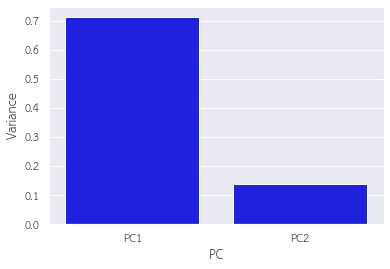

In [24]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca2.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [25]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca2.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

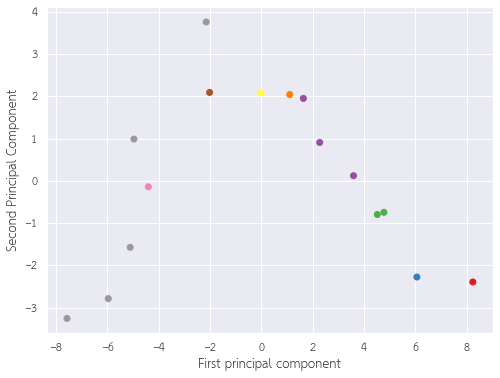

In [26]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [27]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca2.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-2.29792444e-01,  1.42968142e-01, -5.91006455e-02,
         4.78338399e-02,  3.36648108e-01,  2.29102080e-01,
         1.50327196e-01, -9.08643494e-02,  6.45868362e-02,
         1.03710002e-01,  7.71608116e-02, -6.87501672e-01,
        -2.94529655e-02,  9.47152980e-02, -1.41567410e-01,
        -1.31775397e-01,  8.69323438e-02,  1.98190963e-01,
        -2.22971914e-01,  1.14648746e-01, -4.19275997e-01,
         5.98188640e-01,  1.12762812e-01, -2.47836841e-02,
         5.43670378e-02,  1.09844366e-01, -1.84098547e-02,
        -6.38956880e-03,  9.07018552e-02,  1.37449315e-01],
       [ 3.81827167e-01,  1.27881723e-01,  3.49846297e-01,
        -5.56388857e-01, -3.01936091e-01, -5.00496885e-01,
        -5.52670604e-02,  3.25616991e-02, -1.11453150e-01,
        -5.39221183e-01,  2.78887659e-01, -1.08408576e+00,
         4.55230088e-01,  1.31049387e-01,  2.19055680e-01,
         1.62547858e-01,  2.04669439e-01, -4.61354453e-01,
         2.58585293e-01, -1.20583016e-01,  5.23919127e-

<AxesSubplot:>

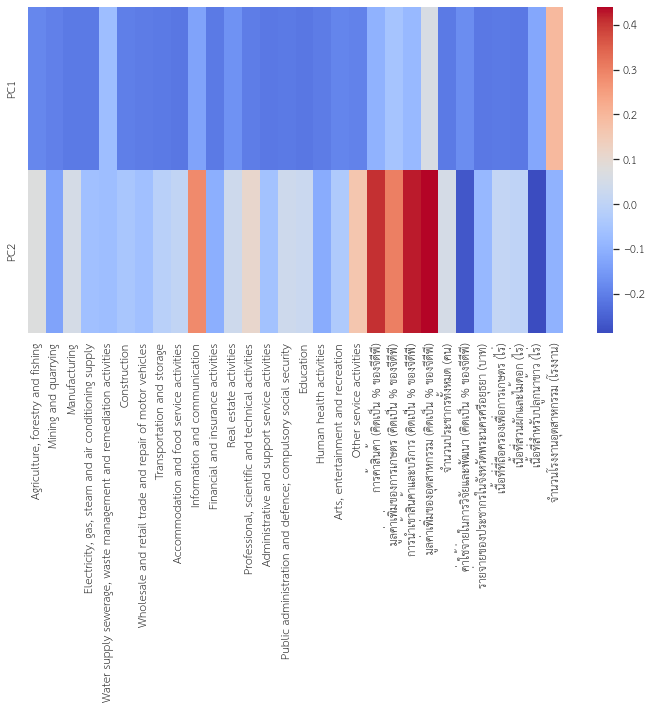

In [28]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca2.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length

#### components = 3

In [29]:
num_components=3
pca3 = PCA(n_components=num_components)
pca3.fit(sk_scaled_X_train)

PCA(n_components=3)

In [30]:
pca3.explained_variance_

array([22.7644557 ,  4.37628832,  2.04287018])

In [31]:
pca3.components_

array([[-0.18611751, -0.19645574, -0.21004653, -0.20822956, -0.06850534,
        -0.19920445, -0.20746954, -0.2087754 , -0.2135885 , -0.13236213,
        -0.20880172, -0.16620102, -0.20458082, -0.21111173, -0.209643  ,
        -0.21344621, -0.20753152, -0.18876347, -0.19386648, -0.09699985,
        -0.05163383, -0.08192225,  0.06031106, -0.20962253, -0.17526345,
        -0.21047688, -0.20830362, -0.21085823, -0.12251046,  0.19354531],
       [ 0.0764663 , -0.13153081,  0.05299136, -0.06319242, -0.07016846,
        -0.0461853 , -0.06518119, -0.01180525,  0.00584367,  0.28463325,
        -0.10607868,  0.03496752,  0.10986784, -0.05934117,  0.03518853,
         0.02745778, -0.11247892, -0.03373164,  0.1626668 ,  0.40769136,
         0.30358794,  0.4243258 ,  0.44057154,  0.05335196, -0.26933749,
        -0.08373069,  0.00998747,  0.00109169, -0.2871255 , -0.0988489 ],
       [ 0.17381195,  0.0337247 ,  0.05930964, -0.05677108, -0.48768278,
        -0.05306332, -0.12979853,  0.09546194,  0

In [32]:
eig_pairs

[(21.341677216045333,
  array([-0.18611751+0.j, -0.19645574+0.j, -0.21004653+0.j, -0.20822956+0.j,
         -0.06850534+0.j, -0.19920445+0.j, -0.20746954+0.j, -0.2087754 +0.j,
         -0.2135885 +0.j, -0.13236213+0.j, -0.20880172+0.j, -0.16620102+0.j,
         -0.20458082+0.j, -0.21111173+0.j, -0.209643  +0.j, -0.21344621+0.j,
         -0.20753152+0.j, -0.18876347+0.j, -0.19386648+0.j, -0.09699985+0.j,
         -0.05163383+0.j, -0.08192225+0.j,  0.06031106+0.j, -0.20962253+0.j,
         -0.17526345+0.j, -0.21047688+0.j, -0.20830362+0.j, -0.21085823+0.j,
         -0.12251046+0.j,  0.19354531+0.j])),
 (4.102770303774184,
  array([-0.0764663 +0.j,  0.13153081+0.j, -0.05299136+0.j,  0.06319242+0.j,
          0.07016846+0.j,  0.0461853 +0.j,  0.06518119+0.j,  0.01180525+0.j,
         -0.00584367+0.j, -0.28463325+0.j,  0.10607868+0.j, -0.03496752+0.j,
         -0.10986784+0.j,  0.05934117+0.j, -0.03518853+0.j, -0.02745778+0.j,
          0.11247892+0.j,  0.03373164+0.j, -0.1626668 +0.j, -0.4

In [33]:
pca3.explained_variance_ratio_

array([0.71138924, 0.13675901, 0.06383969])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

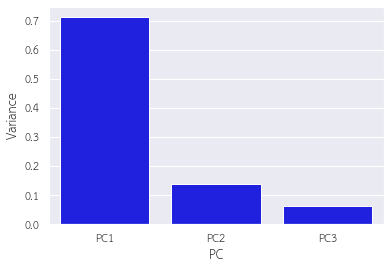

In [34]:
temp_df = pd.DataFrame({'Variance':pca3.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [35]:
sk_X_train_transformed  = pca3.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

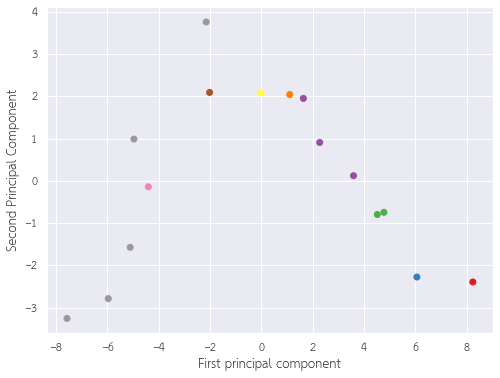

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [37]:
sk_derived_X_train = pca3.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-1.83046605e-01,  1.52038228e-01, -4.31496205e-02,
         3.25655473e-02,  2.05488306e-01,  2.14830970e-01,
         1.15418543e-01, -6.51903452e-02,  7.64887790e-02,
         3.88337024e-03,  9.88485943e-02, -7.87477552e-01,
         4.52946917e-03,  1.05854393e-01, -1.16308074e-01,
        -1.25859623e-01,  1.13884211e-01,  1.57735201e-01,
        -1.71434235e-01,  8.64160298e-02, -3.04775887e-01,
         6.04404291e-01,  1.05650465e-01, -4.47256793e-02,
         2.94552936e-02,  8.95816982e-02, -2.08712471e-02,
        -1.45193483e-02,  1.74758373e-01,  1.23837210e-01],
       [ 1.01552182e-01,  7.35000236e-02,  2.54208410e-01,
        -4.64844444e-01,  4.84461410e-01, -4.14931300e-01,
         1.54035467e-01, -1.21372452e-01, -1.82813871e-01,
         5.93113905e-02,  1.48853778e-01, -4.84658338e-01,
         2.51480911e-01,  6.42624859e-02,  6.76077610e-02,
         1.27078529e-01,  4.30735781e-02, -2.18793011e-01,
        -5.04202224e-02,  4.86924533e-02, -1.62591515e-

<AxesSubplot:>

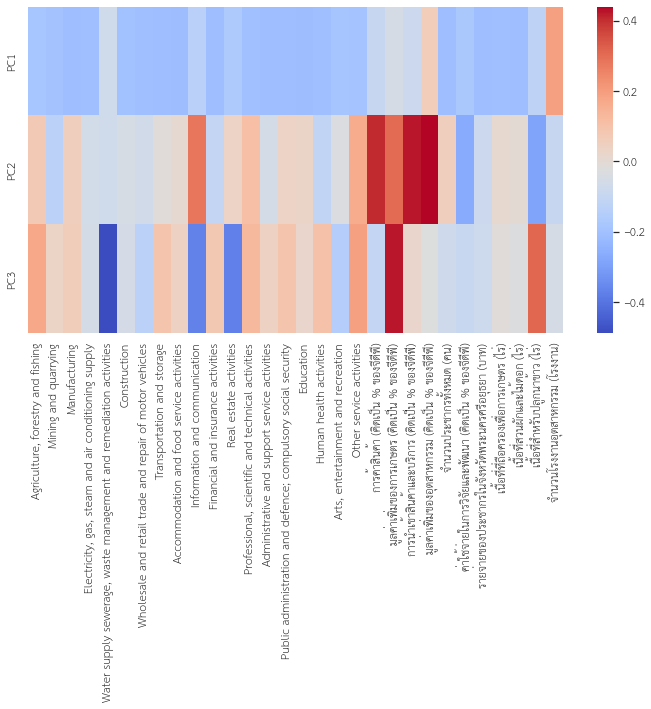

In [38]:
temp_df3 = pd.DataFrame(pca3.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 4

In [39]:
num_components=4
pca4 = PCA(n_components=num_components)
pca4.fit(sk_scaled_X_train)

PCA(n_components=4)

In [40]:
pca4.explained_variance_

array([22.7644557 ,  4.37628832,  2.04287018,  1.02082453])

In [41]:
pca4.components_

array([[-0.18611751, -0.19645574, -0.21004653, -0.20822956, -0.06850534,
        -0.19920445, -0.20746954, -0.2087754 , -0.2135885 , -0.13236213,
        -0.20880172, -0.16620102, -0.20458082, -0.21111173, -0.209643  ,
        -0.21344621, -0.20753152, -0.18876347, -0.19386648, -0.09699985,
        -0.05163383, -0.08192225,  0.06031106, -0.20962253, -0.17526345,
        -0.21047688, -0.20830362, -0.21085823, -0.12251046,  0.19354531],
       [ 0.0764663 , -0.13153081,  0.05299136, -0.06319242, -0.07016846,
        -0.0461853 , -0.06518119, -0.01180525,  0.00584367,  0.28463325,
        -0.10607868,  0.03496752,  0.10986784, -0.05934117,  0.03518853,
         0.02745778, -0.11247892, -0.03373164,  0.1626668 ,  0.40769136,
         0.30358794,  0.4243258 ,  0.44057154,  0.05335196, -0.26933749,
        -0.08373069,  0.00998747,  0.00109169, -0.2871255 , -0.0988489 ],
       [ 0.17381195,  0.0337247 ,  0.05930964, -0.05677108, -0.48768278,
        -0.05306332, -0.12979853,  0.09546194,  0

In [42]:
eig_pairs

[(21.341677216045333,
  array([-0.18611751+0.j, -0.19645574+0.j, -0.21004653+0.j, -0.20822956+0.j,
         -0.06850534+0.j, -0.19920445+0.j, -0.20746954+0.j, -0.2087754 +0.j,
         -0.2135885 +0.j, -0.13236213+0.j, -0.20880172+0.j, -0.16620102+0.j,
         -0.20458082+0.j, -0.21111173+0.j, -0.209643  +0.j, -0.21344621+0.j,
         -0.20753152+0.j, -0.18876347+0.j, -0.19386648+0.j, -0.09699985+0.j,
         -0.05163383+0.j, -0.08192225+0.j,  0.06031106+0.j, -0.20962253+0.j,
         -0.17526345+0.j, -0.21047688+0.j, -0.20830362+0.j, -0.21085823+0.j,
         -0.12251046+0.j,  0.19354531+0.j])),
 (4.102770303774184,
  array([-0.0764663 +0.j,  0.13153081+0.j, -0.05299136+0.j,  0.06319242+0.j,
          0.07016846+0.j,  0.0461853 +0.j,  0.06518119+0.j,  0.01180525+0.j,
         -0.00584367+0.j, -0.28463325+0.j,  0.10607868+0.j, -0.03496752+0.j,
         -0.10986784+0.j,  0.05934117+0.j, -0.03518853+0.j, -0.02745778+0.j,
          0.11247892+0.j,  0.03373164+0.j, -0.1626668 +0.j, -0.4

In [43]:
pca4.explained_variance_ratio_

array([0.71138924, 0.13675901, 0.06383969, 0.03190077])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

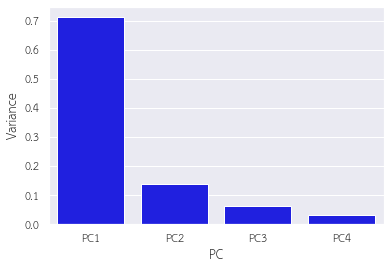

In [44]:
temp_df = pd.DataFrame({'Variance':pca4.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [45]:
sk_X_train_transformed  = pca4.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

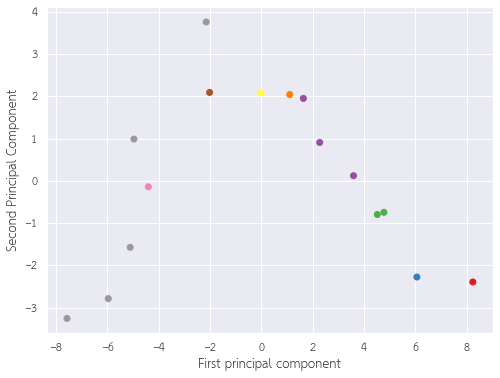

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [47]:
sk_derived_X_train = pca4.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-2.00893315e-01,  1.88255363e-01, -3.69101084e-02,
         2.93687055e-02,  1.12844743e-01,  2.53244709e-01,
         1.12252466e-01, -4.70888145e-02,  9.54204685e-02,
         1.44341987e-02,  1.01906985e-01, -7.70178930e-01,
         1.43968999e-02,  1.08393284e-01, -1.26709030e-01,
        -1.19572998e-01,  1.07841073e-01,  1.40990580e-01,
        -1.68175598e-01,  6.18673692e-02, -3.58813686e-01,
         5.82610889e-01,  1.42830141e-01, -5.68737367e-02,
         2.72307545e-02,  8.92624804e-02, -1.35231900e-02,
        -2.28555706e-03,  1.23009822e-01,  1.30661092e-01],
       [ 5.11387672e-02,  1.75806239e-01,  2.71833793e-01,
        -4.73874888e-01,  2.22761738e-01, -3.06420117e-01,
         1.45091929e-01, -7.02392220e-02, -1.29335607e-01,
         8.91153861e-02,  1.57493125e-01, -4.35793166e-01,
         2.79354444e-01,  7.14343493e-02,  3.82271254e-02,
         1.44836993e-01,  2.60029112e-02, -2.66093240e-01,
        -4.12152187e-02, -2.06526391e-02, -3.15237567e-

<AxesSubplot:>

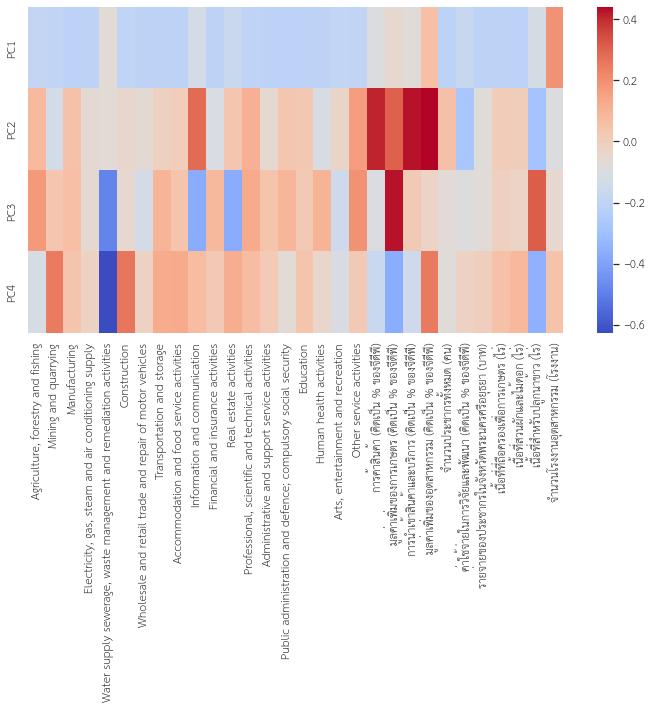

In [48]:
temp_df3 = pd.DataFrame(pca4.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 5

In [49]:
num_components=5
pca5 = PCA(n_components=num_components)
pca5.fit(sk_scaled_X_train)

PCA(n_components=5)

In [50]:
pca5.explained_variance_

array([22.7644557 ,  4.37628832,  2.04287018,  1.02082453,  0.65651549])

In [51]:
pca5.components_

array([[-0.18611751, -0.19645574, -0.21004653, -0.20822956, -0.06850534,
        -0.19920445, -0.20746954, -0.2087754 , -0.2135885 , -0.13236213,
        -0.20880172, -0.16620102, -0.20458082, -0.21111173, -0.209643  ,
        -0.21344621, -0.20753152, -0.18876347, -0.19386648, -0.09699985,
        -0.05163383, -0.08192225,  0.06031106, -0.20962253, -0.17526345,
        -0.21047688, -0.20830362, -0.21085823, -0.12251046,  0.19354531],
       [ 0.0764663 , -0.13153081,  0.05299136, -0.06319242, -0.07016846,
        -0.0461853 , -0.06518119, -0.01180525,  0.00584367,  0.28463325,
        -0.10607868,  0.03496752,  0.10986784, -0.05934117,  0.03518853,
         0.02745778, -0.11247892, -0.03373164,  0.1626668 ,  0.40769136,
         0.30358794,  0.4243258 ,  0.44057154,  0.05335196, -0.26933749,
        -0.08373069,  0.00998747,  0.00109169, -0.2871255 , -0.0988489 ],
       [ 0.17381195,  0.0337247 ,  0.05930964, -0.05677108, -0.48768278,
        -0.05306332, -0.12979853,  0.09546194,  0

In [52]:
eig_pairs

[(21.341677216045333,
  array([-0.18611751+0.j, -0.19645574+0.j, -0.21004653+0.j, -0.20822956+0.j,
         -0.06850534+0.j, -0.19920445+0.j, -0.20746954+0.j, -0.2087754 +0.j,
         -0.2135885 +0.j, -0.13236213+0.j, -0.20880172+0.j, -0.16620102+0.j,
         -0.20458082+0.j, -0.21111173+0.j, -0.209643  +0.j, -0.21344621+0.j,
         -0.20753152+0.j, -0.18876347+0.j, -0.19386648+0.j, -0.09699985+0.j,
         -0.05163383+0.j, -0.08192225+0.j,  0.06031106+0.j, -0.20962253+0.j,
         -0.17526345+0.j, -0.21047688+0.j, -0.20830362+0.j, -0.21085823+0.j,
         -0.12251046+0.j,  0.19354531+0.j])),
 (4.102770303774184,
  array([-0.0764663 +0.j,  0.13153081+0.j, -0.05299136+0.j,  0.06319242+0.j,
          0.07016846+0.j,  0.0461853 +0.j,  0.06518119+0.j,  0.01180525+0.j,
         -0.00584367+0.j, -0.28463325+0.j,  0.10607868+0.j, -0.03496752+0.j,
         -0.10986784+0.j,  0.05934117+0.j, -0.03518853+0.j, -0.02745778+0.j,
          0.11247892+0.j,  0.03373164+0.j, -0.1626668 +0.j, -0.4

In [53]:
pca5.explained_variance_ratio_

array([0.71138924, 0.13675901, 0.06383969, 0.03190077, 0.02051611])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

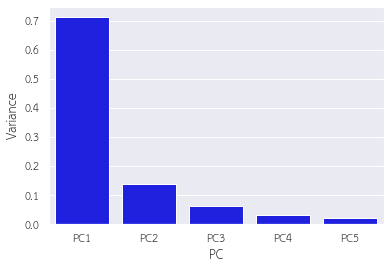

In [54]:
temp_df = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [55]:
sk_X_train_transformed  = pca5.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

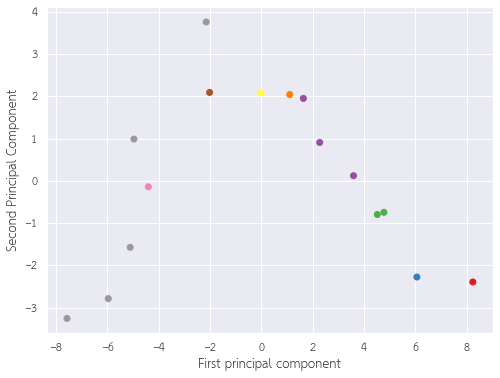

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [57]:
sk_derived_X_train = pca5.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 7.00077492e-02,  8.29362887e-02,  6.33678412e-02,
        -5.82666985e-03,  1.53774741e-01,  1.42872556e-01,
         1.28005763e-01, -8.97675047e-02,  7.61085223e-02,
        -1.99746265e-02,  8.62399498e-02, -6.66271506e-01,
         3.27157241e-02,  1.54932236e-01, -1.88263455e-01,
        -1.76244597e-01,  5.02565163e-02, -4.07985399e-02,
        -2.18884805e-01, -4.82686901e-02, -3.60494835e-01,
         4.42696210e-01,  1.21581706e-01, -1.02700271e-01,
        -4.76516237e-02,  1.36273204e-01,  1.48852799e-01,
         3.98923842e-02,  3.15723365e-03, -1.24161252e-01],
       [-1.11194197e-01,  2.38916946e-01,  2.11743897e-01,
        -4.52784643e-01,  1.98235117e-01, -2.40281437e-01,
         1.35652027e-01, -4.46647256e-02, -1.17763244e-01,
         1.09734303e-01,  1.66881336e-01, -4.98057965e-01,
         2.68377193e-01,  4.35466555e-02,  7.51125928e-02,
         1.78796508e-01,  6.05095003e-02, -1.57159129e-01,
        -1.08285682e-02,  4.53445654e-02, -3.14230166e-

<AxesSubplot:>

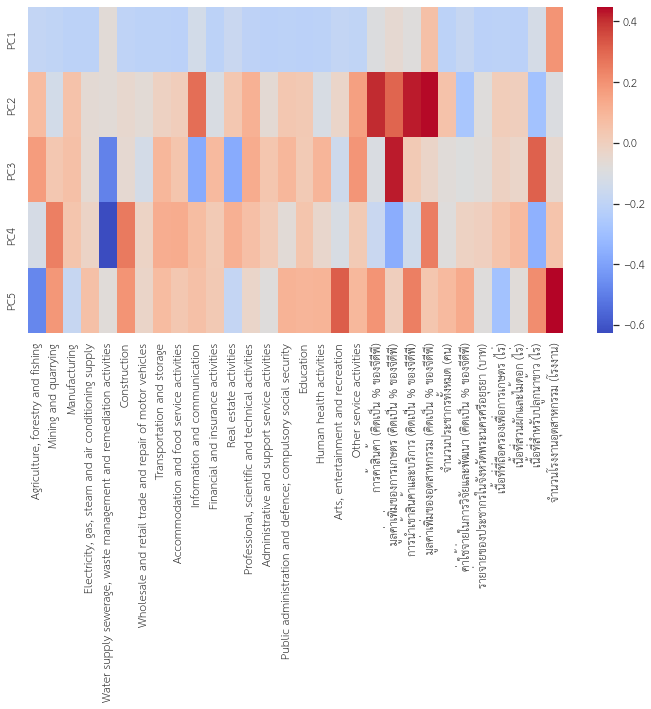

In [58]:
temp_df3 = pd.DataFrame(pca5.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 6

In [59]:
num_components=6
pca6 = PCA(n_components=num_components)
pca6.fit(sk_scaled_X_train)

PCA(n_components=6)

In [60]:
pca6.explained_variance_

array([22.7644557 ,  4.37628832,  2.04287018,  1.02082453,  0.65651549,
        0.33209041])

In [61]:
pca6.components_

array([[-0.18611751, -0.19645574, -0.21004653, -0.20822956, -0.06850534,
        -0.19920445, -0.20746954, -0.2087754 , -0.2135885 , -0.13236213,
        -0.20880172, -0.16620102, -0.20458082, -0.21111173, -0.209643  ,
        -0.21344621, -0.20753152, -0.18876347, -0.19386648, -0.09699985,
        -0.05163383, -0.08192225,  0.06031106, -0.20962253, -0.17526345,
        -0.21047688, -0.20830362, -0.21085823, -0.12251046,  0.19354531],
       [ 0.0764663 , -0.13153081,  0.05299136, -0.06319242, -0.07016846,
        -0.0461853 , -0.06518119, -0.01180525,  0.00584367,  0.28463325,
        -0.10607868,  0.03496752,  0.10986784, -0.05934117,  0.03518853,
         0.02745778, -0.11247892, -0.03373164,  0.1626668 ,  0.40769136,
         0.30358794,  0.4243258 ,  0.44057154,  0.05335196, -0.26933749,
        -0.08373069,  0.00998747,  0.00109169, -0.2871255 , -0.0988489 ],
       [ 0.17381195,  0.0337247 ,  0.05930964, -0.05677108, -0.48768278,
        -0.05306332, -0.12979853,  0.09546194,  0

In [62]:
eig_pairs

[(21.341677216045333,
  array([-0.18611751+0.j, -0.19645574+0.j, -0.21004653+0.j, -0.20822956+0.j,
         -0.06850534+0.j, -0.19920445+0.j, -0.20746954+0.j, -0.2087754 +0.j,
         -0.2135885 +0.j, -0.13236213+0.j, -0.20880172+0.j, -0.16620102+0.j,
         -0.20458082+0.j, -0.21111173+0.j, -0.209643  +0.j, -0.21344621+0.j,
         -0.20753152+0.j, -0.18876347+0.j, -0.19386648+0.j, -0.09699985+0.j,
         -0.05163383+0.j, -0.08192225+0.j,  0.06031106+0.j, -0.20962253+0.j,
         -0.17526345+0.j, -0.21047688+0.j, -0.20830362+0.j, -0.21085823+0.j,
         -0.12251046+0.j,  0.19354531+0.j])),
 (4.102770303774184,
  array([-0.0764663 +0.j,  0.13153081+0.j, -0.05299136+0.j,  0.06319242+0.j,
          0.07016846+0.j,  0.0461853 +0.j,  0.06518119+0.j,  0.01180525+0.j,
         -0.00584367+0.j, -0.28463325+0.j,  0.10607868+0.j, -0.03496752+0.j,
         -0.10986784+0.j,  0.05934117+0.j, -0.03518853+0.j, -0.02745778+0.j,
          0.11247892+0.j,  0.03373164+0.j, -0.1626668 +0.j, -0.4

In [63]:
pca6.explained_variance_ratio_

array([0.71138924, 0.13675901, 0.06383969, 0.03190077, 0.02051611,
       0.01037783])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

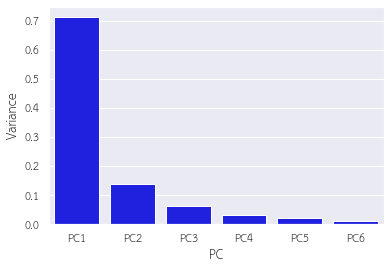

In [64]:
temp_df = pd.DataFrame({'Variance':pca6.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [65]:
sk_X_train_transformed  = pca6.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

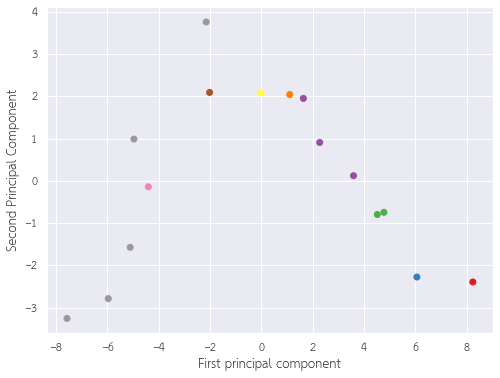

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [67]:
sk_derived_X_train = pca6.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-7.88846248e-02,  6.03250710e-02,  1.00784387e-01,
        -8.90375733e-02,  1.87530438e-01,  1.46904457e-01,
         2.57230651e-01,  8.56691938e-02,  8.17895267e-02,
         5.86414856e-02,  1.94355542e-02, -4.78970164e-01,
         1.83287239e-02,  8.81811985e-03, -6.31256497e-02,
        -1.43769047e-01,  2.97030876e-02, -3.57721092e-01,
        -1.25954592e-01, -5.48408323e-02, -1.31676577e-01,
         2.69948091e-01,  2.89161285e-02, -4.56489394e-02,
         4.67445480e-03,  1.27350198e-01,  5.03284938e-02,
         1.22323200e-01, -2.36143939e-02, -8.01561982e-03],
       [-1.28919807e-01,  2.36225084e-01,  2.16198330e-01,
        -4.62690887e-01,  2.02253726e-01, -2.39801440e-01,
         1.51036227e-01, -2.37790181e-02, -1.17086921e-01,
         1.19093537e-01,  1.58928284e-01, -4.75759774e-01,
         2.66664423e-01,  2.61517962e-02,  9.00102261e-02,
         1.82662716e-01,  5.80626183e-02, -1.94888702e-01,
         2.34757033e-04,  4.45621531e-02, -2.86989393e-

<AxesSubplot:>

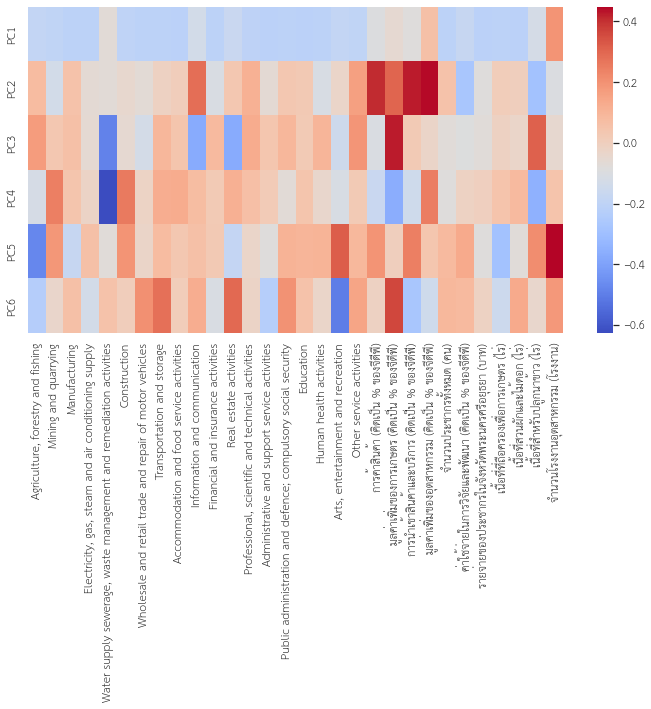

In [68]:
temp_df3 = pd.DataFrame(pca6.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')